In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15,4)
plt.rcParams['xtick.labelsize']=10

In [2]:
df_L=pd.read_csv('C:\\Users\\gramakot\\OneDrive - UHG\\Upgrad\\Lending Club Case Study\\loan.csv')
df_L.shape
Nan_Coulmns=df_L.columns[df_L.isna().any()].tolist()
Nan_Dict={}
for c in Nan_Coulmns:
    Nan_Dict[c]=df_L[c].isna().sum()
dict(sorted(Nan_Dict.items(), key=lambda kv: kv[1],reverse=True))

{'mths_since_last_major_derog': 39717,
 'annual_inc_joint': 39717,
 'dti_joint': 39717,
 'verification_status_joint': 39717,
 'tot_coll_amt': 39717,
 'tot_cur_bal': 39717,
 'open_acc_6m': 39717,
 'open_il_6m': 39717,
 'open_il_12m': 39717,
 'open_il_24m': 39717,
 'mths_since_rcnt_il': 39717,
 'total_bal_il': 39717,
 'il_util': 39717,
 'open_rv_12m': 39717,
 'open_rv_24m': 39717,
 'max_bal_bc': 39717,
 'all_util': 39717,
 'total_rev_hi_lim': 39717,
 'inq_fi': 39717,
 'total_cu_tl': 39717,
 'inq_last_12m': 39717,
 'acc_open_past_24mths': 39717,
 'avg_cur_bal': 39717,
 'bc_open_to_buy': 39717,
 'bc_util': 39717,
 'mo_sin_old_il_acct': 39717,
 'mo_sin_old_rev_tl_op': 39717,
 'mo_sin_rcnt_rev_tl_op': 39717,
 'mo_sin_rcnt_tl': 39717,
 'mort_acc': 39717,
 'mths_since_recent_bc': 39717,
 'mths_since_recent_bc_dlq': 39717,
 'mths_since_recent_inq': 39717,
 'mths_since_recent_revol_delinq': 39717,
 'num_accts_ever_120_pd': 39717,
 'num_actv_bc_tl': 39717,
 'num_actv_rev_tl': 39717,
 'num_bc_sats

**We are removing the columns that are having null values and The  columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them**

In [3]:
df_Nan=pd.DataFrame()
df_Nan['Columns']=list(Nan_Dict.keys())
df_Nan['Counts']=list(Nan_Dict.values())
Drop_Columns=df_Nan[df_Nan['Counts']>12940]['Columns'].to_list()
#Columns Which are not needed
del1=['collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','pymnt_plan','initial_list_status']
behaviour_var = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]

In [4]:
Columns_Deleted=Drop_Columns+del1+behaviour_var
df_L.drop(Columns_Deleted,axis=1,inplace=True)
df_L['int_rate']=df_L['int_rate'].str.split('%',expand=True)[0]
df_L['int_rate']=df_L['int_rate'].astype(float)

In [7]:
df_L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  float64
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [8]:
list(df_L.select_dtypes(include=['object']).columns)

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state']

In [13]:
df_L=df_L[df_L['loan_status']!='Current']
df_L['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

<AxesSubplot:>

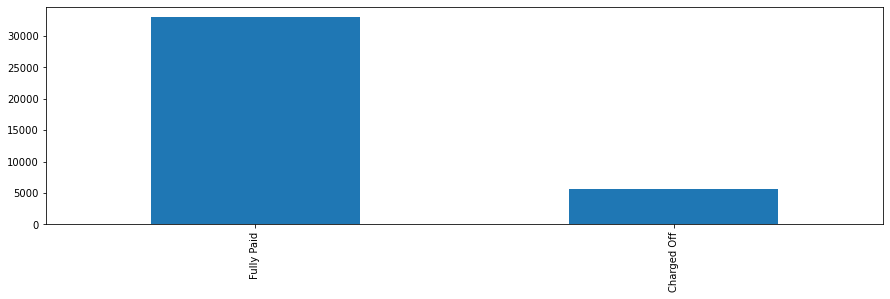

In [17]:
df_L['loan_status'].value_counts().plot(kind='bar')

**THis is an imbalanced data set. So we need to normalize charged off and fully paid categories**

# Univariate Analysis

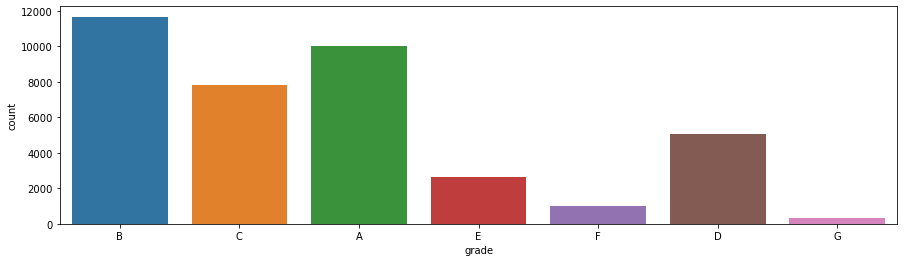

In [200]:
sns.countplot(x='grade', data=df_L)
plt.show()

In [202]:
df_L.sub_grade = pd.to_numeric(df_L.sub_grade.apply(lambda x : x[-1]))
df_L.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

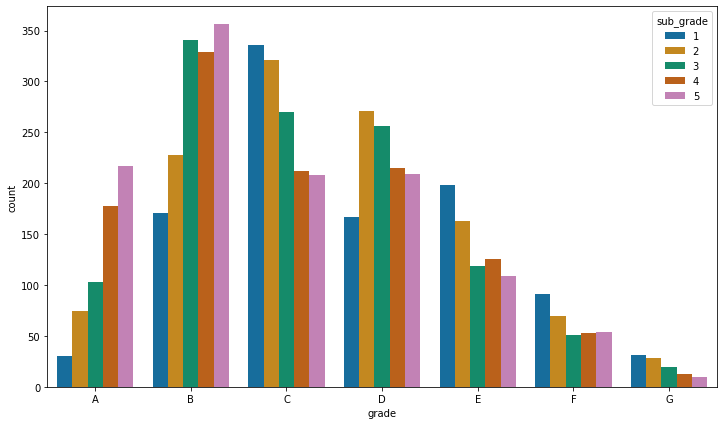

In [203]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df_L[df_L.loan_status == 'Charged Off'])

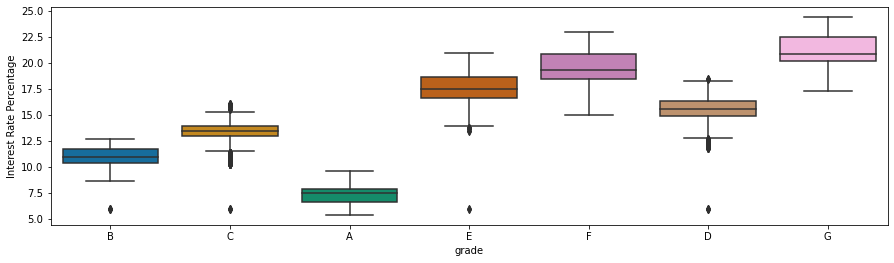

In [204]:
sns.boxplot(y='int_rate', x='grade', data=df_L)
plt.ylabel('Interest Rate Percentage')
plt.show()

# Analysing Categorical Variables

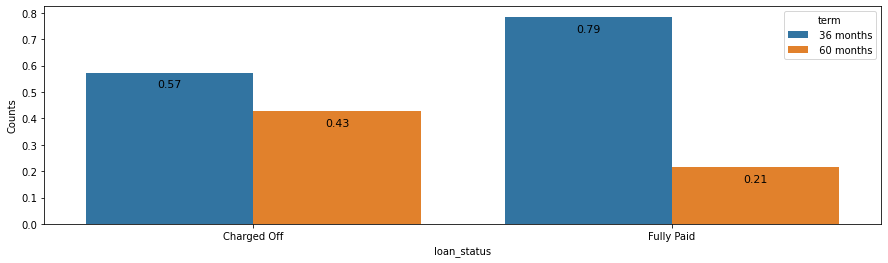

In [20]:
df_u=df_L.groupby(['loan_status'])['term'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='term',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***TERM***

From the graph we can observe that for the people who has taken **60 months term** has more tendency to charged off

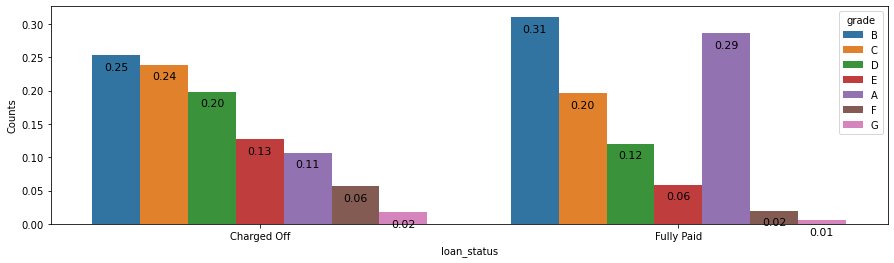

In [21]:
df_u=df_L.groupby(['loan_status'])['grade'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='grade',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***GRADE***

1. Grades with A and B has less tendency to get charged off
2. Grades with C and D has more tendency to get charged off

In [199]:
sum(df_L['emp_length'].isin([np.nan]))

1033

**Since the missing values in emp_length are very less. I choose to ignore them instead of imputing them with mode and introducing bias**

<AxesSubplot:>

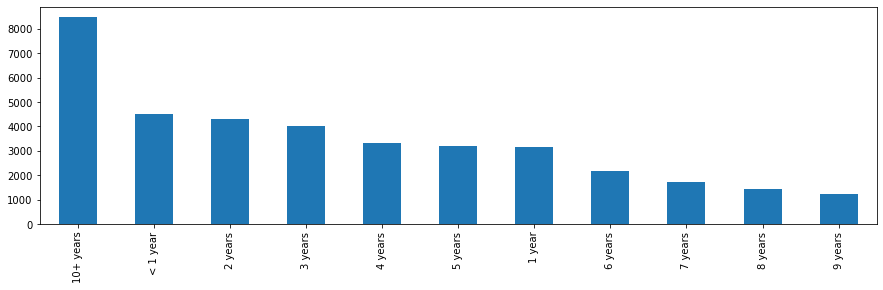

In [26]:
df_L['emp_length'].value_counts().plot(kind='bar')

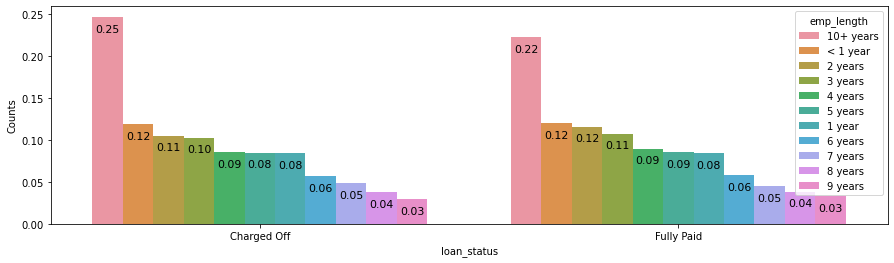

In [27]:
df_u=df_L.groupby(['loan_status'])['emp_length'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='emp_length',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***emp_length***

People with 10+ experience has more tendency to get charged off

<AxesSubplot:>

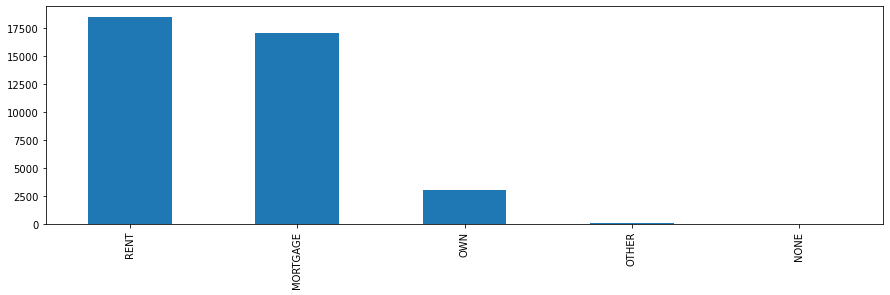

In [28]:
df_L['home_ownership'].value_counts().plot(kind='bar')

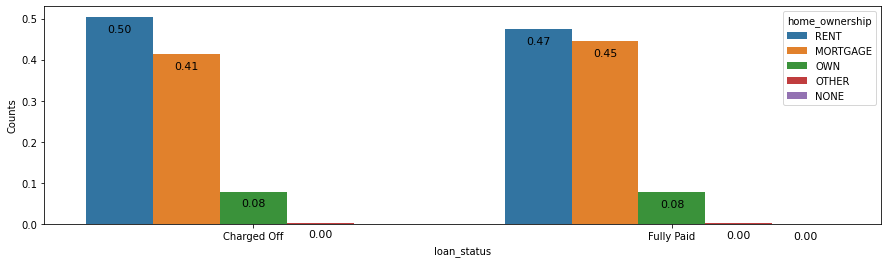

In [29]:
df_u=df_L.groupby(['loan_status'])['home_ownership'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='home_ownership',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***home_ownership***

People staying in rented home has more tendency to get charged off

<AxesSubplot:>

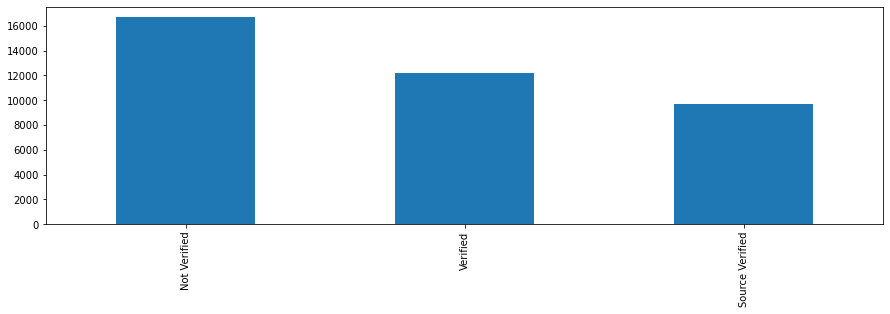

In [30]:
df_L['verification_status'].value_counts().plot(kind='bar')

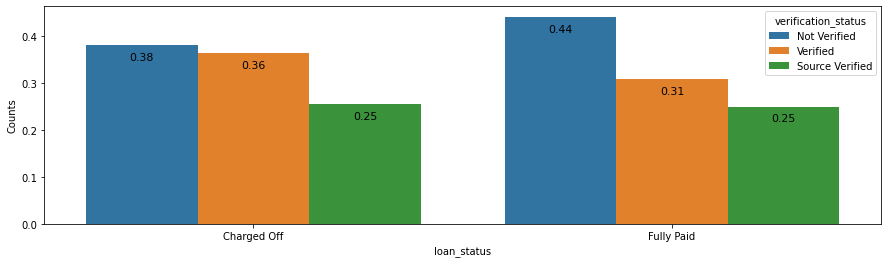

In [31]:
df_u=df_L.groupby(['loan_status'])['verification_status'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='verification_status',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***verification_status***

Strangely people whose income is verified has more tendency to get charged off. This may be just a coincidence or people are paying money to get thier income verified

<AxesSubplot:>

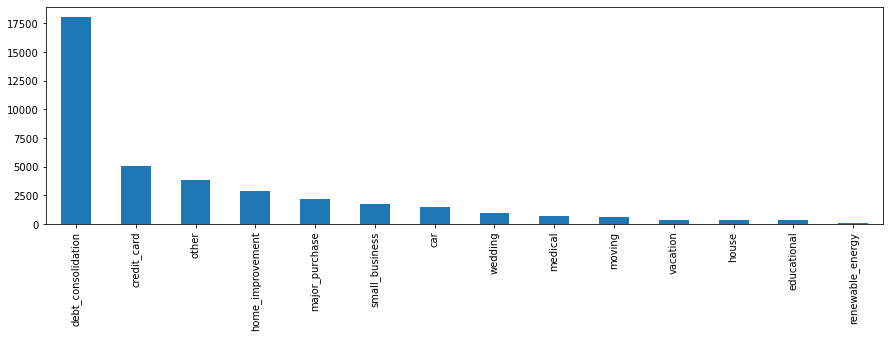

In [32]:
df_L['purpose'].value_counts().plot(kind='bar')

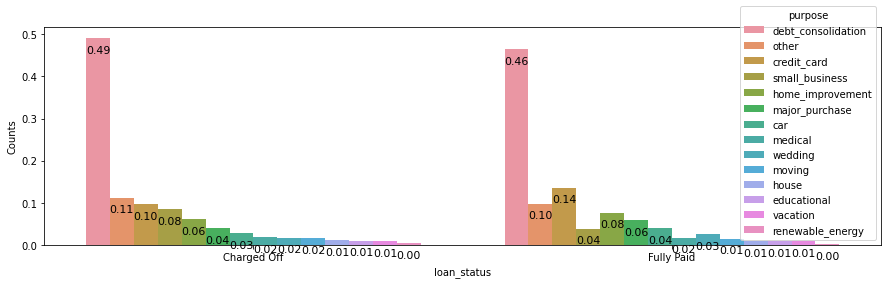

In [33]:
df_u=df_L.groupby(['loan_status'])['purpose'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='purpose',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***Since most of loans are with debt_consolidation to understand remaining categories we are Zooming in the graph***

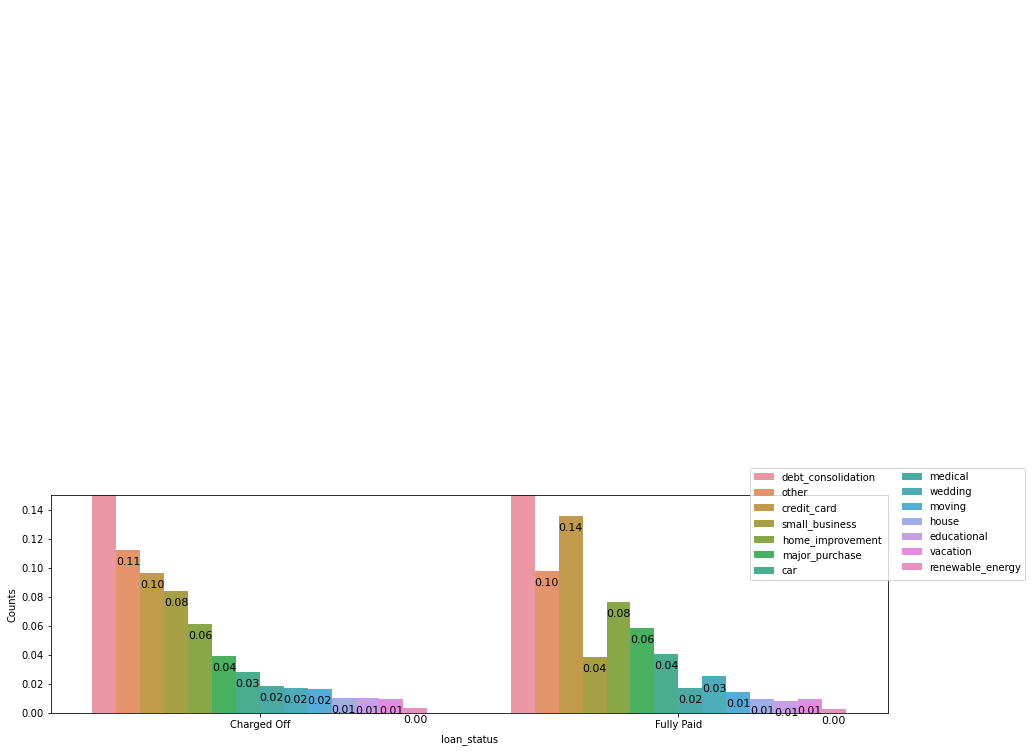

In [40]:
df_u=df_L.groupby(['loan_status'])['purpose'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='purpose',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)
plt.ylim(0,0.15)
plt.legend(loc="upper center", bbox_to_anchor=(1, 1.15), ncol=2)

***purpose***

debt_consolidation,other,small_business and car loans have tendency get charged off

In [57]:
Top_Addr=list(df_L['addr_state'].value_counts().head(10).index)#.plot(kind='bar')

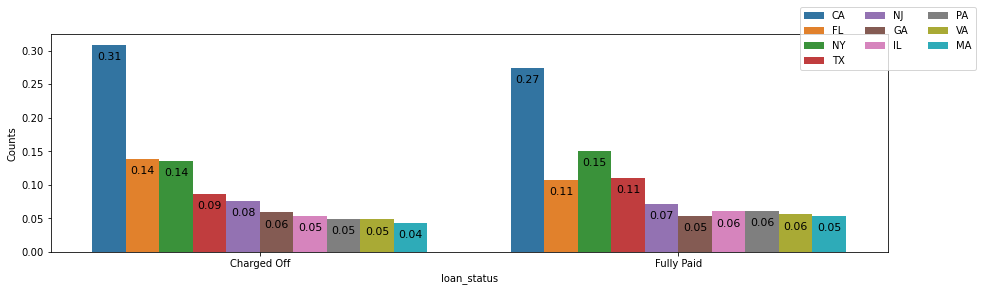

In [59]:
df_u=df_L[df_L['addr_state'].isin(Top_Addr)].groupby(['loan_status'])['addr_state'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='addr_state',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)
plt.legend(loc="upper center", bbox_to_anchor=(1, 1.15), ncol=3)

**Loan Tendency in top 10 states**

1. California and Florida loans have more tendency get charged off
2. People in Newyork has more tendency pay their loans fully

# Analysing Quantitative Variables

In [60]:
list(df_L.select_dtypes(exclude=['object']).columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'pub_rec_bankruptcies']

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

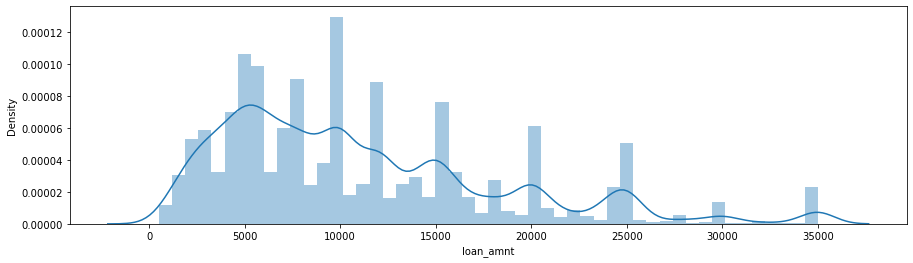

In [63]:
sns.distplot(df_L['loan_amnt'])

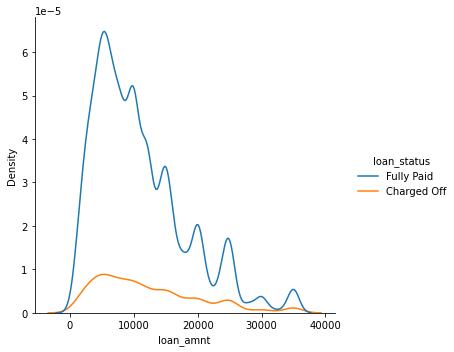

In [64]:
sns.displot(data=df_L,x='loan_amnt',hue='loan_status',kind='kde')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

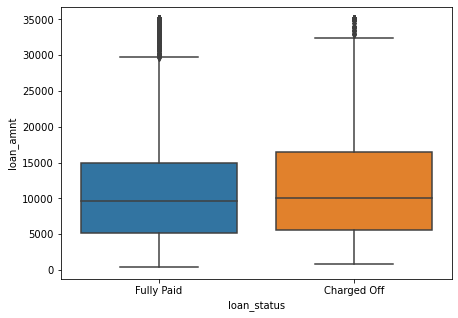

In [113]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df_L)

***loan_amnt***

Loans with high amnt has more tendency to get charged off

In [65]:
df_L['Loan_Amnt_Cat']=['low' if x<6000 else 'medium' if x>=6000 and x<15000 else 'high' if x>=15000 and x<25000 else 'Very High' for x in list(df_L['loan_amnt'])]

***Converting Loan_Amnt to categorical Variables***

<AxesSubplot:>

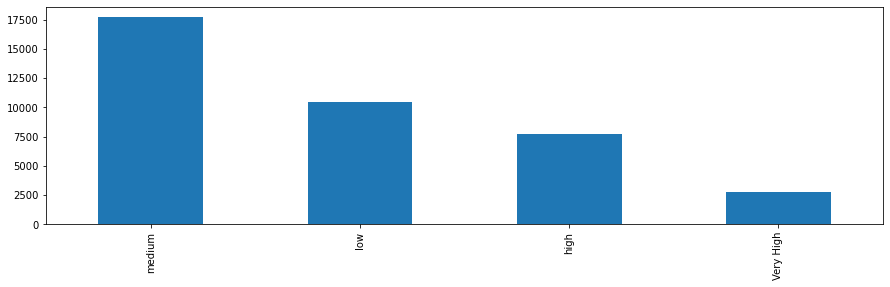

In [67]:
df_L['Loan_Amnt_Cat'].value_counts().plot(kind='bar')

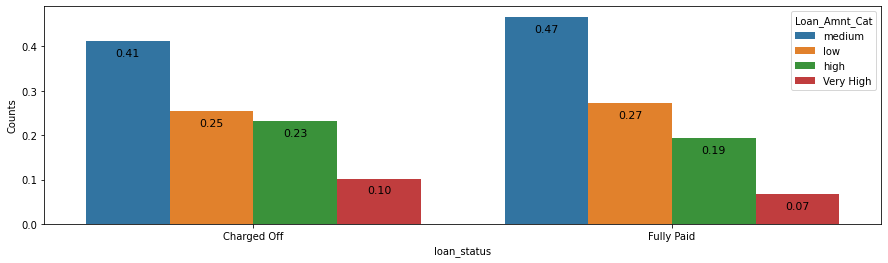

In [68]:
df_u=df_L.groupby(['loan_status'])['Loan_Amnt_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='Loan_Amnt_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***Loan_Amnt***

Loans with high and Very_High amounts have tendency get charged off

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

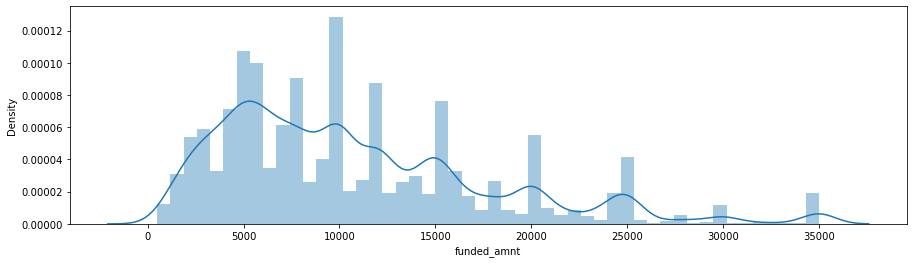

In [69]:
sns.distplot(df_L['funded_amnt'])

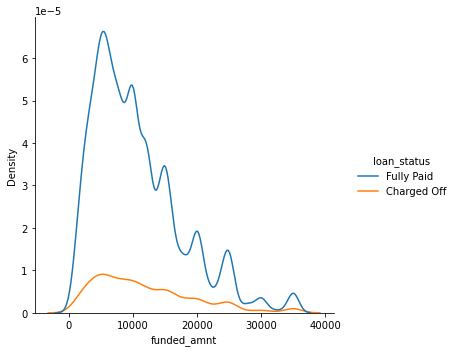

In [70]:
sns.displot(data=df_L,x='funded_amnt',hue='loan_status',kind='kde')

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

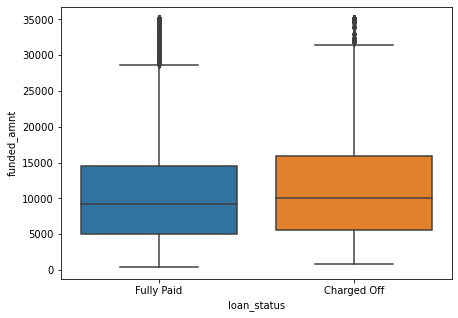

In [114]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='funded_amnt',data=df_L)

<AxesSubplot:>

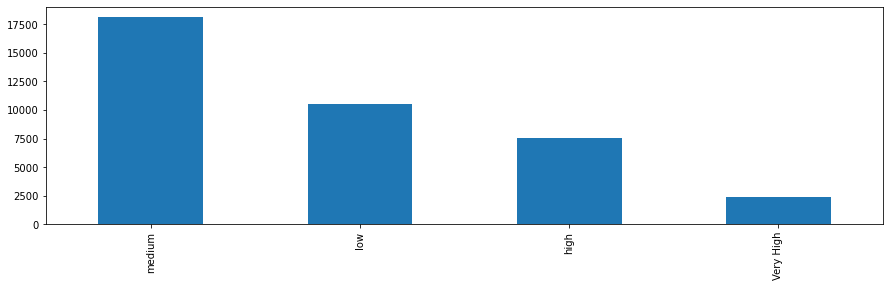

In [71]:
df_L['funded_amnt_Cat']=['low' if x<6000 else 'medium' if x>=6000 and x<15000 else 'high' if x>=15000 and x<25000 else 'Very High' for x in list(df_L['funded_amnt'])]
df_L['funded_amnt_Cat'].value_counts().plot(kind='bar')

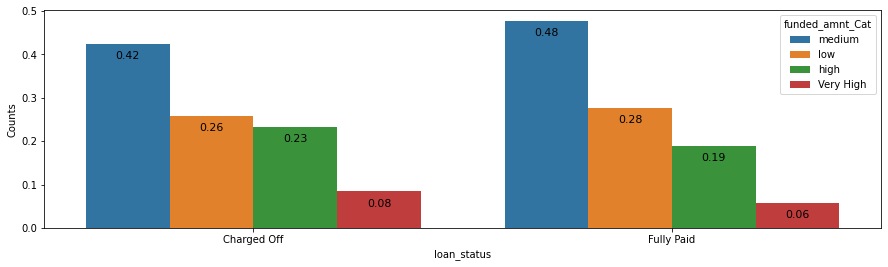

In [72]:
df_u=df_L.groupby(['loan_status'])['funded_amnt_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='funded_amnt_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***funded_amnt***

Loans with high and Very_High amounts have tendency get charged off

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

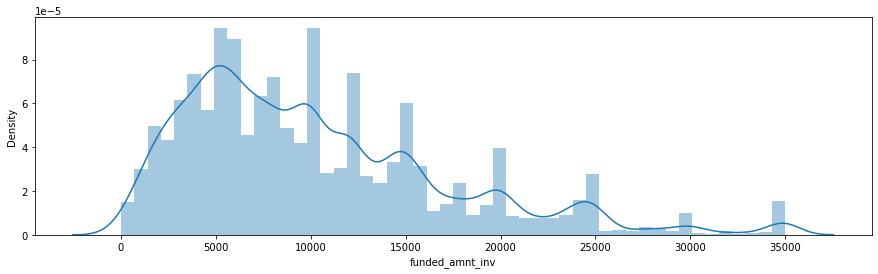

In [73]:
sns.distplot(df_L['funded_amnt_inv'])

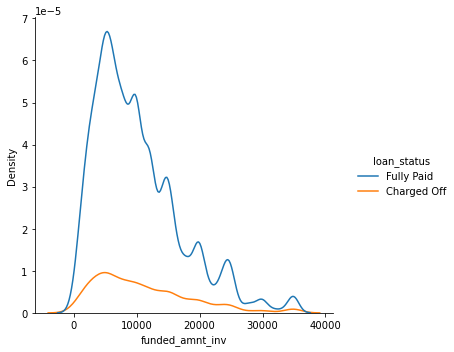

In [74]:
sns.displot(data=df_L,x='funded_amnt_inv',hue='loan_status',kind='kde')

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

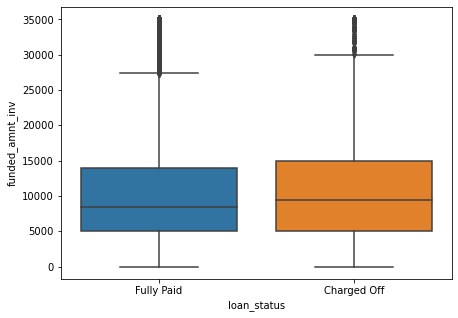

In [115]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='funded_amnt_inv',data=df_L)

<AxesSubplot:>

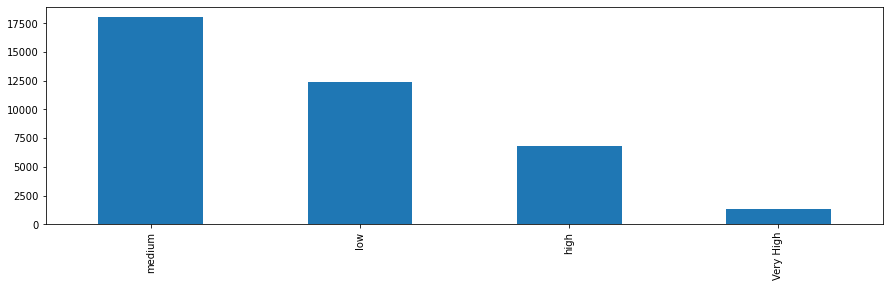

In [75]:
df_L['funded_amnt_inv_Cat']=['low' if x<6000 else 'medium' if x>=6000 and x<15000 else 'high' if x>=15000 and x<25000 else 'Very High' for x in list(df_L['funded_amnt_inv'])]
df_L['funded_amnt_inv_Cat'].value_counts().plot(kind='bar')

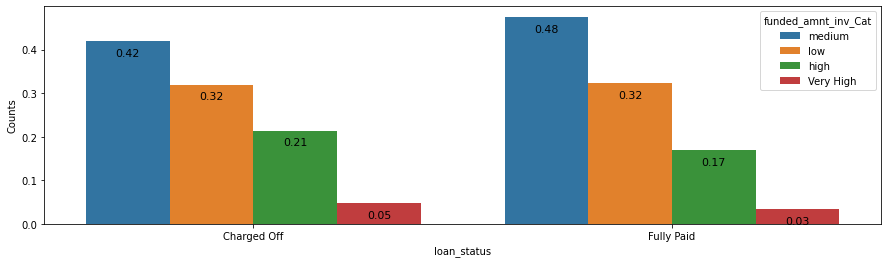

In [76]:
df_u=df_L.groupby(['loan_status'])['funded_amnt_inv_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='funded_amnt_inv_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***funded_amnt_inv***

Loans with high and Very_High amounts have tendency get charged off

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

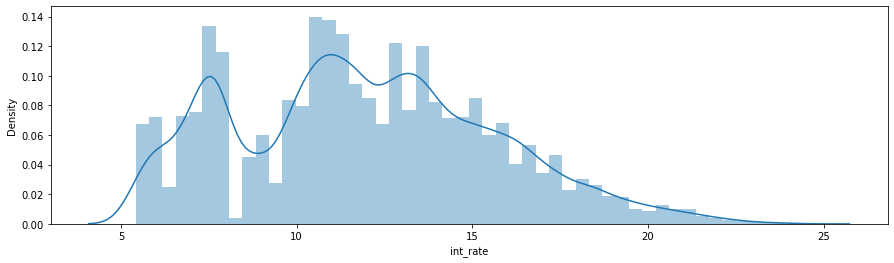

In [77]:
sns.distplot(df_L['int_rate'])

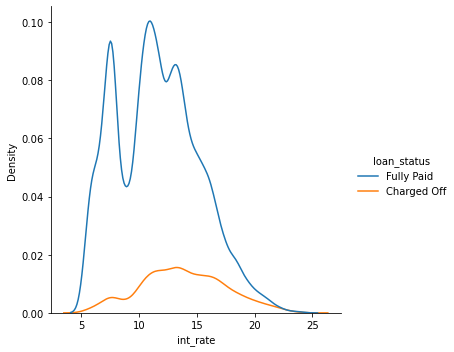

In [80]:
sns.displot(data=df_L,x='int_rate',hue='loan_status',kind='kde')

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

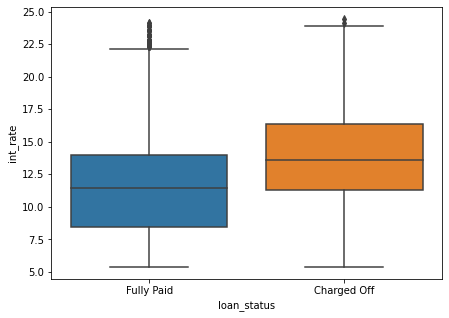

In [117]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='int_rate',data=df_L)

<AxesSubplot:>

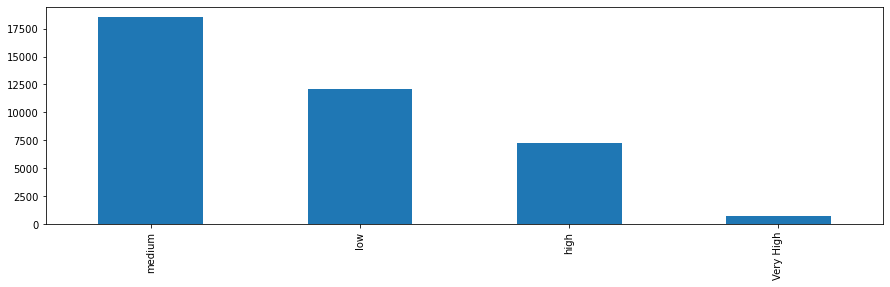

In [81]:
df_L['int_rate_Cat']=['low' if x<10 else 'medium' if x>=10 and x<15 else 'high' if x>=15 and x<20 else 'Very High' for x in list(df_L['int_rate'])]
df_L['int_rate_Cat'].value_counts().plot(kind='bar')

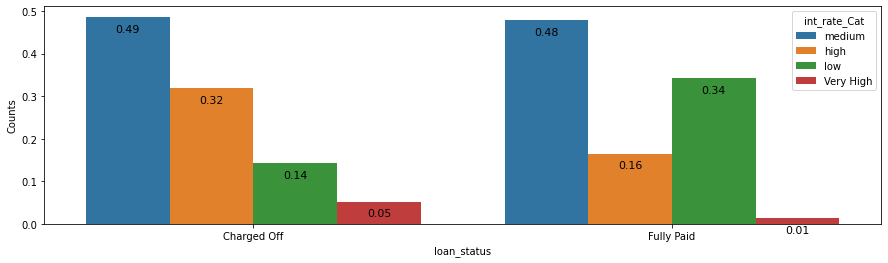

In [116]:
df_u=df_L.groupby(['loan_status'])['int_rate_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='int_rate_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)

***int_rate***

Loans with high and very high interest are likely to get charged off

<AxesSubplot:xlabel='installment', ylabel='Density'>

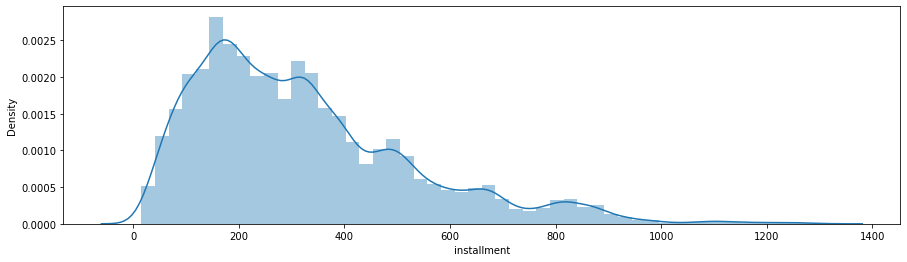

In [83]:
sns.distplot(df_L['installment'])

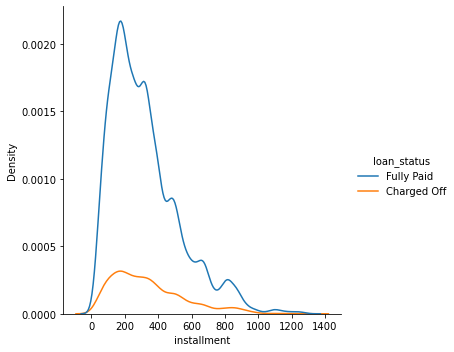

In [84]:
sns.displot(data=df_L,x='installment',hue='loan_status',kind='kde')

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

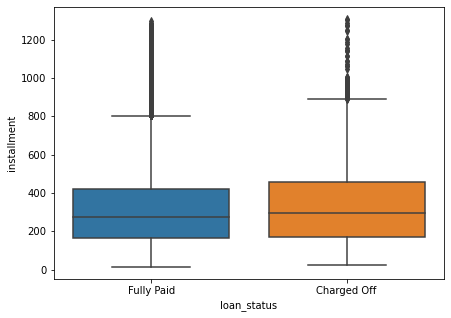

In [118]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='installment',data=df_L)

<AxesSubplot:>

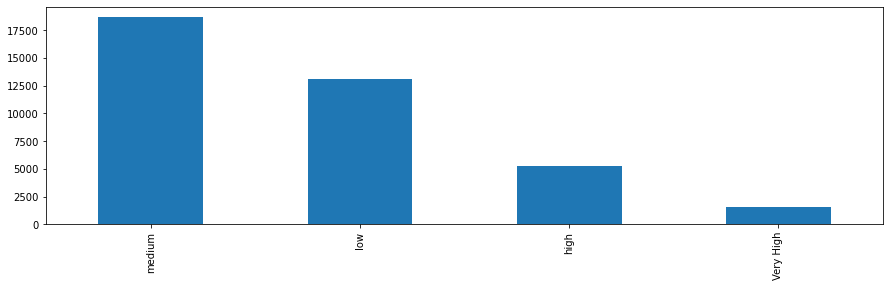

In [86]:
df_L['installment_Cat']=['low' if x<200 else 'medium' if x>=200 and x<500 else 'high' if x>=500 and x<800 else 'Very High' for x in list(df_L['installment'])]
df_L['installment_Cat'].value_counts().plot(kind='bar')

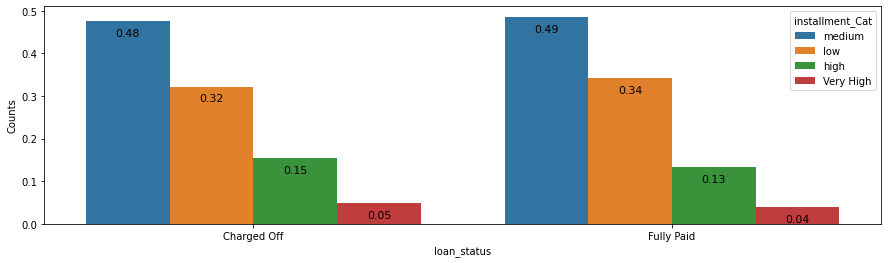

In [87]:
df_u=df_L.groupby(['loan_status'])['installment_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='installment_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


***installment***

Loans with high and very high installments are likely to get charged off

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

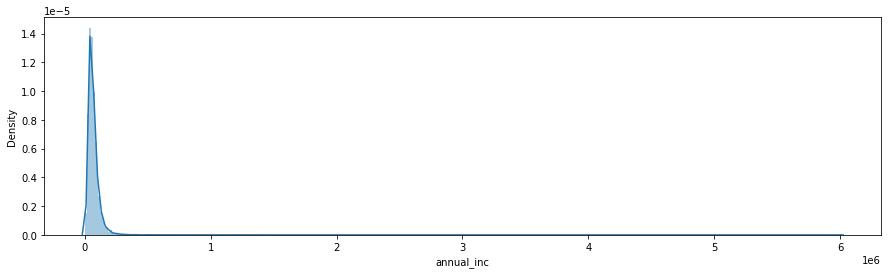

In [194]:
sns.distplot(df_L['annual_inc'],bins=400)

**There seems to be outliers in the annual_inc. We can eliminate outliers by zooming in the grapg a little bit. So that we canderstand the spread of remaining data**

(0.0, 200000.0)

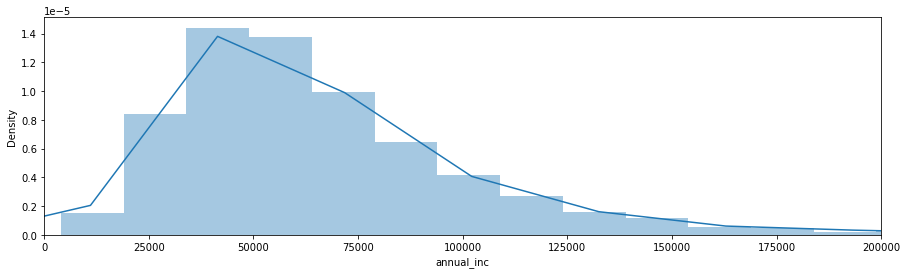

In [100]:
sns.distplot(df_L['annual_inc'],bins=400)
plt.xlim(0,200000)

In [92]:
df_L['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

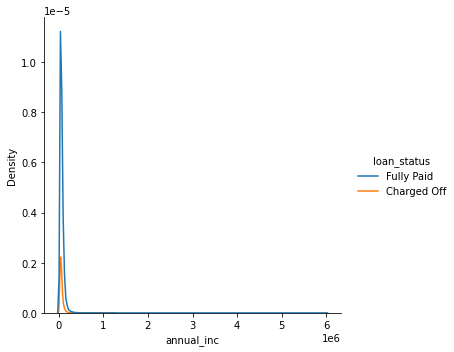

In [89]:
sns.displot(data=df_L,x='annual_inc',hue='loan_status',kind='kde')

(0.0, 200000.0)

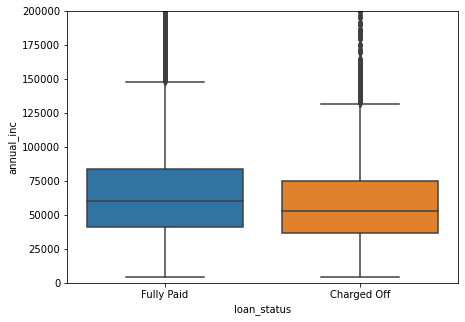

In [120]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='annual_inc',data=df_L)
plt.ylim(0,200000)

<AxesSubplot:>

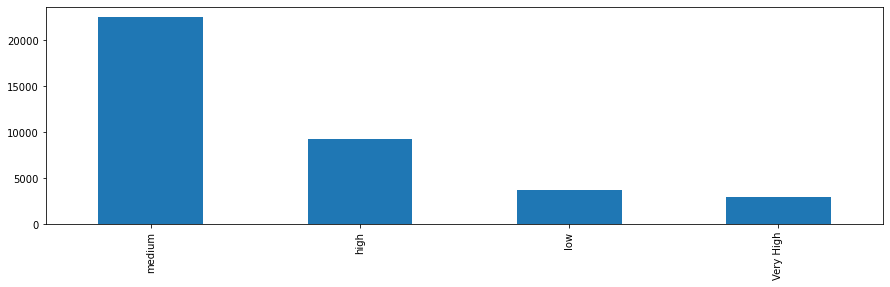

In [101]:
df_L['annual_inc_Cat']=['low' if x<30000 else 'medium' if x>=30000 and x<75000 else 'high' if x>=75000 and x<125000 else 'Very High' for x in list(df_L['annual_inc'])]
df_L['annual_inc_Cat'].value_counts().plot(kind='bar')

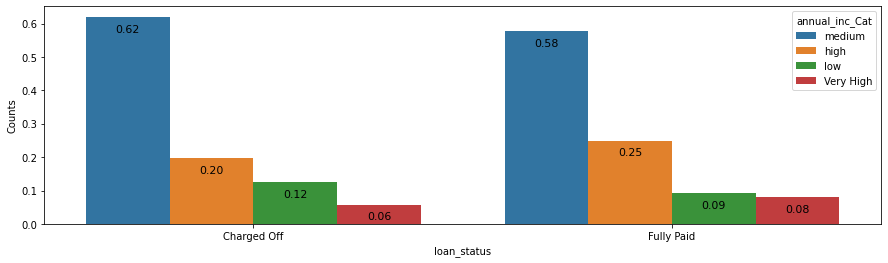

In [102]:
df_u=df_L.groupby(['loan_status'])['annual_inc_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='annual_inc_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


***annual_inc***

People with low and medium income are likely to get charged off

<AxesSubplot:xlabel='dti', ylabel='Density'>

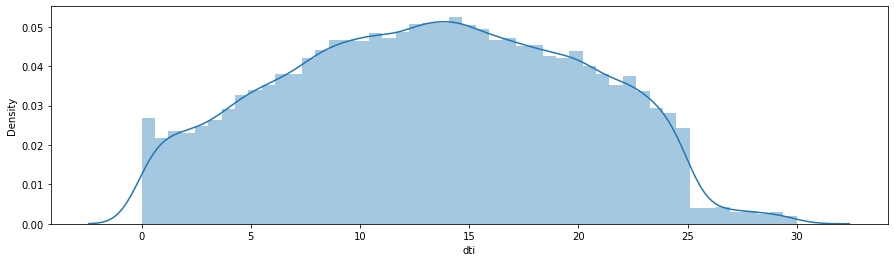

In [105]:
sns.distplot(df_L['dti'])

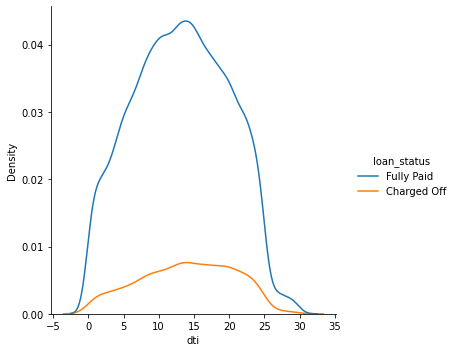

In [106]:
sns.displot(data=df_L,x='dti',hue='loan_status',kind='kde')

<AxesSubplot:>

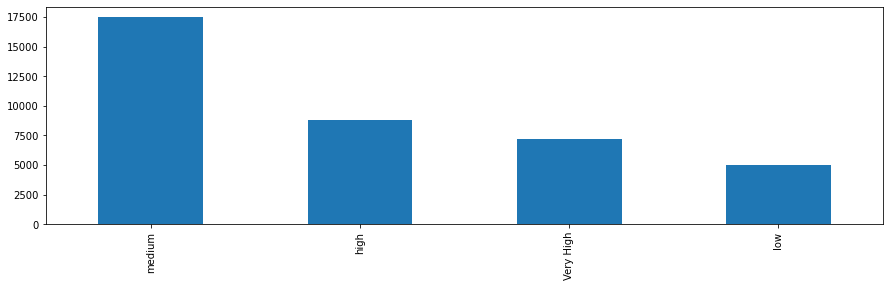

In [107]:
df_L['dti_Cat']=['low' if x<5 else 'medium' if x>=5 and x<15 else 'high' if x>=15 and x<20 else 'Very High' for x in list(df_L['dti'])]
df_L['dti_Cat'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

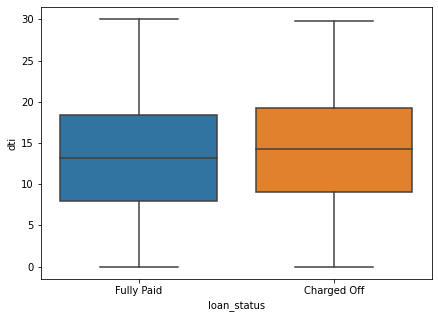

In [121]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='dti',data=df_L)

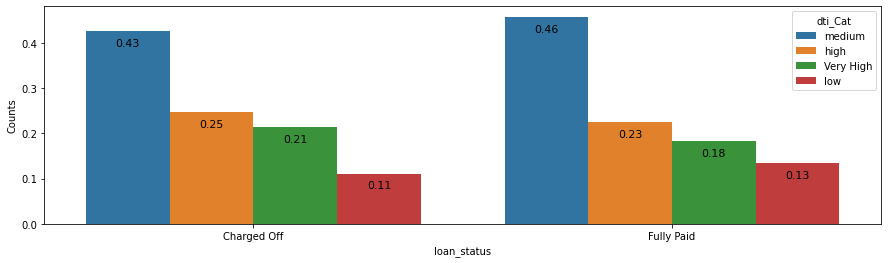

In [108]:
df_u=df_L.groupby(['loan_status'])['dti_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='dti_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


***dti***

people with high and very high debt to income ratios are likely to get charged off

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

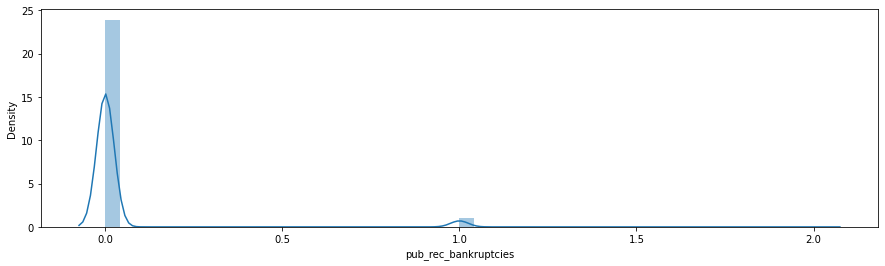

In [109]:
sns.distplot(df_L['pub_rec_bankruptcies'])

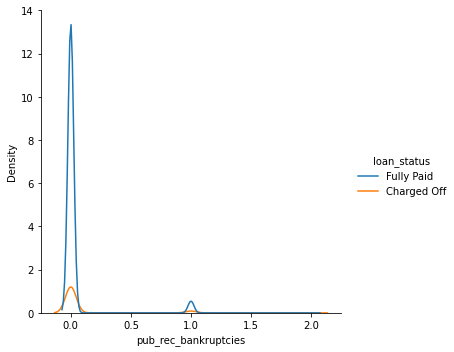

In [110]:
sns.displot(data=df_L,x='pub_rec_bankruptcies',hue='loan_status',kind='kde')

<AxesSubplot:>

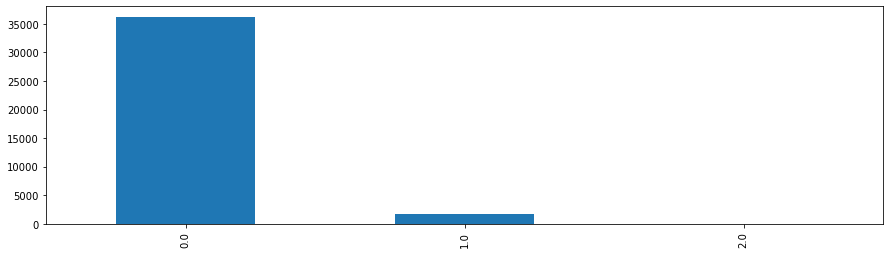

In [195]:
df_L['pub_rec_bankruptcies'].value_counts().plot(kind='bar')

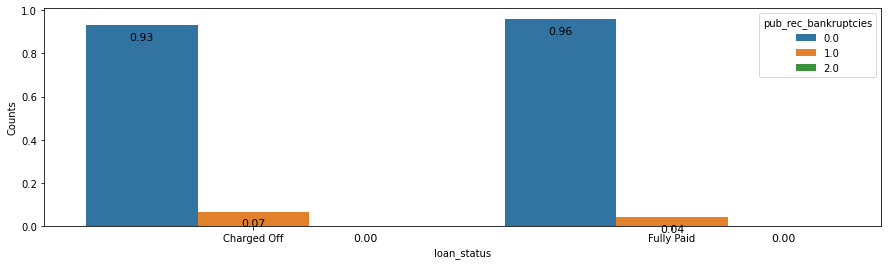

In [112]:
df_u=df_L.groupby(['loan_status'])['pub_rec_bankruptcies'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='pub_rec_bankruptcies',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


In [122]:
df_L.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  float64
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

# Derived metrics

**Deriving a new column Ann_Inc_Ins_diff**

New column is the difference between Monthly income(Annual income divided by 12) minus installment. From common sense we know that if difference between monthly income and installment is low, Consumer feels difficulty in paying installments, Hence likey to get charged off.

In [182]:
df_L['Ann_Inc_Ins_diff']=(df_L['annual_inc']/12)-df_L['installment']

(0.0, 20000.0)

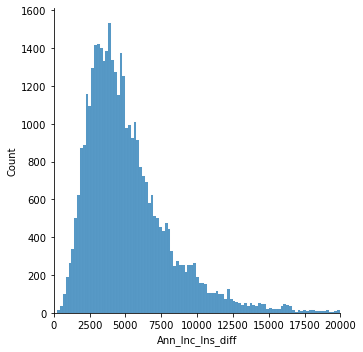

In [132]:
sns.displot(df_L['Ann_Inc_Ins_diff'])
plt.xlim(0,20000)

(0.0, 50000.0)

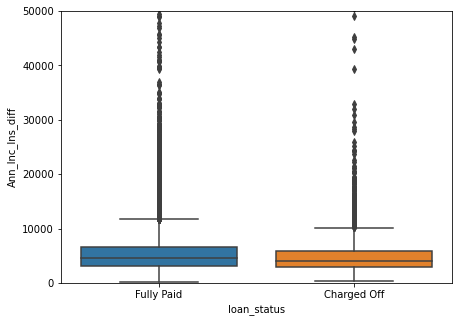

In [127]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='Ann_Inc_Ins_diff',data=df_L)
plt.ylim(0,50000)

<AxesSubplot:>

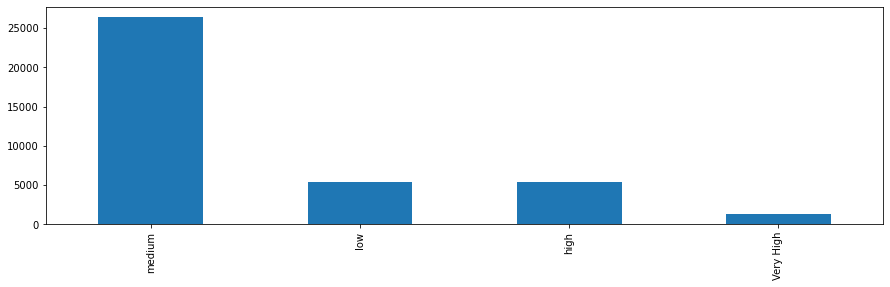

In [133]:
df_L['Ann_Inc_Ins_diff_Cat']=['low' if x<2500 else 'medium' if x>=2500 and x<7500 else 'high' if x>=7500 and x<12500 else 'Very High' for x in list(df_L['Ann_Inc_Ins_diff'])]
df_L['Ann_Inc_Ins_diff_Cat'].value_counts().plot(kind='bar')

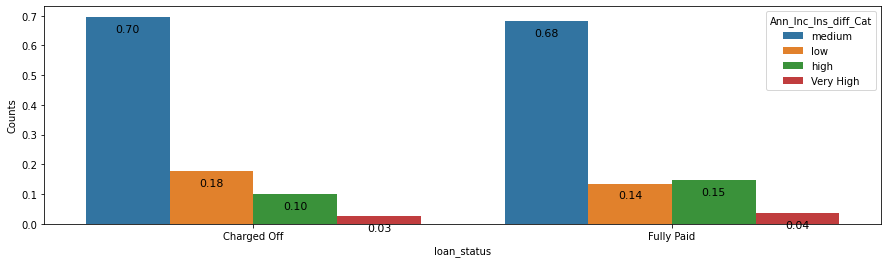

In [134]:
df_u=df_L.groupby(['loan_status'])['Ann_Inc_Ins_diff_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='Ann_Inc_Ins_diff_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


*For the loans with medium and low diffrence are likely to charged off*

**Deriving one more column by dividing Ann_Inc_Ins_diff which we derived above with dti**

Some times even when the difference between monthly income and installment is high, if debt to income ratio is high consumer might feel difficulty in paying back loans. So if we divide dti with above derived column. We can understand consumer paying capabaility.

In [158]:
df_L['dti'].replace(0,1,inplace=True)
df_L['Ann_Inc_Ins_diff_dti']=df_L['Ann_Inc_Ins_diff']/df_L['dti']

In [161]:
df_L['Ann_Inc_Ins_diff_dti'].describe()

count    3.857700e+04
mean     2.595400e+03
std      2.550642e+05
min      1.887008e+01
25%      2.123189e+02
50%      3.607718e+02
75%      6.881650e+02
max      4.998322e+07
Name: Ann_Inc_Ins_diff_dti, dtype: float64

(0.0, 5000.0)

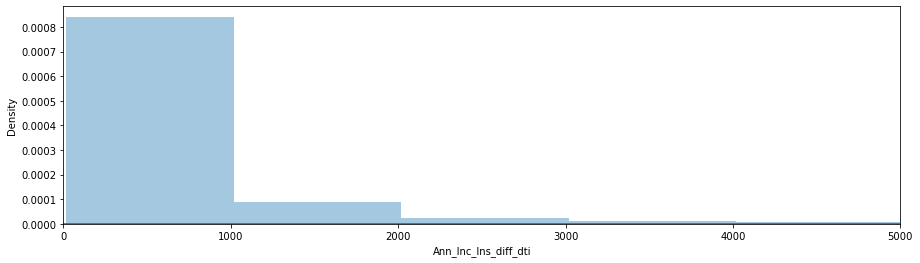

In [177]:
sns.distplot(df_L['Ann_Inc_Ins_diff_dti'],bins=50000)
plt.xlim(0,5000)

(0.0, 5000.0)

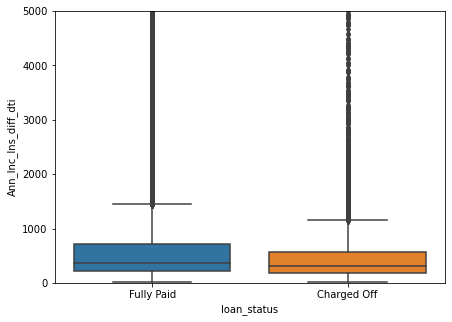

In [173]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='Ann_Inc_Ins_diff_dti',data=df_L)
plt.ylim(0,5000)

<AxesSubplot:>

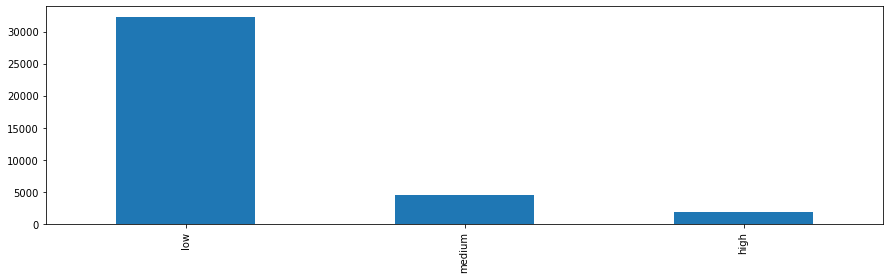

In [179]:
df_L['Ann_Inc_Ins_diff_dti_Cat']=['low' if x<1000 else 'medium' if x>=1000 and x<3000 else 'high' for x in list(df_L['Ann_Inc_Ins_diff_dti'])]
df_L['Ann_Inc_Ins_diff_dti_Cat'].value_counts().plot(kind='bar')

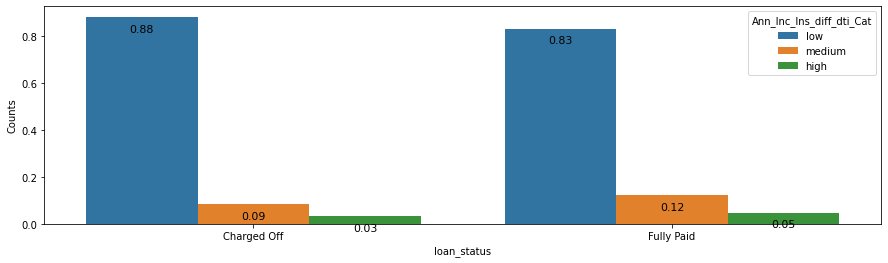

In [180]:
df_u=df_L.groupby(['loan_status'])['Ann_Inc_Ins_diff_dti_Cat'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='Ann_Inc_Ins_diff_dti_Cat',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


People with low (monthly income - installment)/dti likely get charged off

**Type driven Derived metrics based on date the loan is issued**

In [191]:
df_L['Issued_Month']=df_L['issue_d'].str.split('-',expand=True)[0]
df_L['Issued_year']=df_L['issue_d'].str.split('-',expand=True)[1]

<AxesSubplot:>

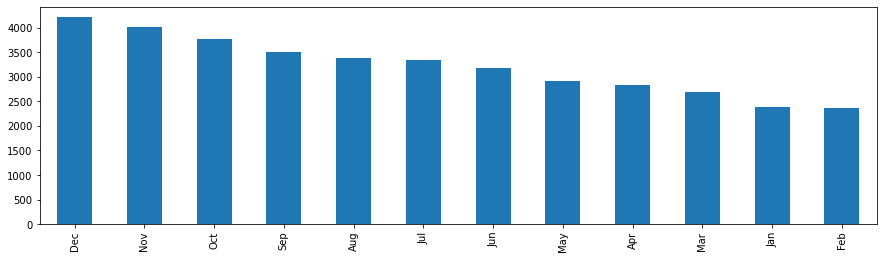

In [189]:
df_L['Issued_Month'].value_counts().plot(kind='bar')

<AxesSubplot:>

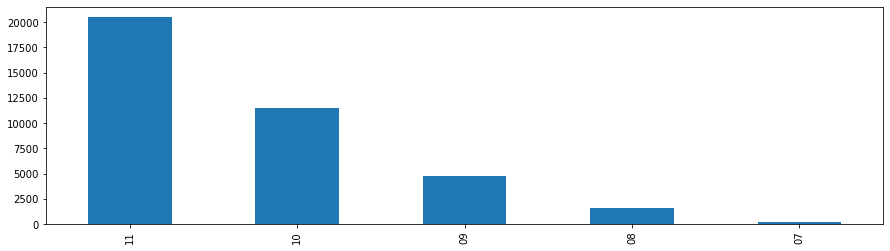

In [192]:
df_L['Issued_year'].value_counts().plot(kind='bar')

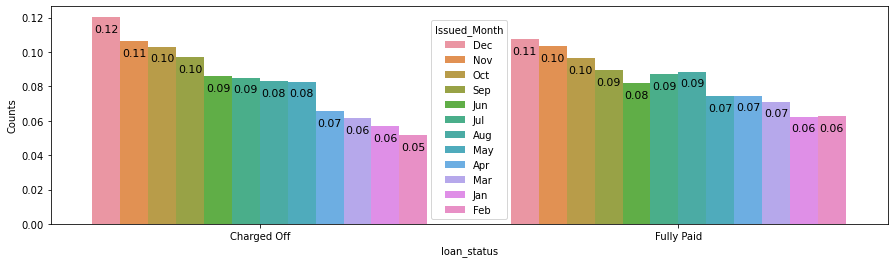

In [190]:
df_u=df_L.groupby(['loan_status'])['Issued_Month'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='Issued_Month',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


**In December most loans seems to be charged off**

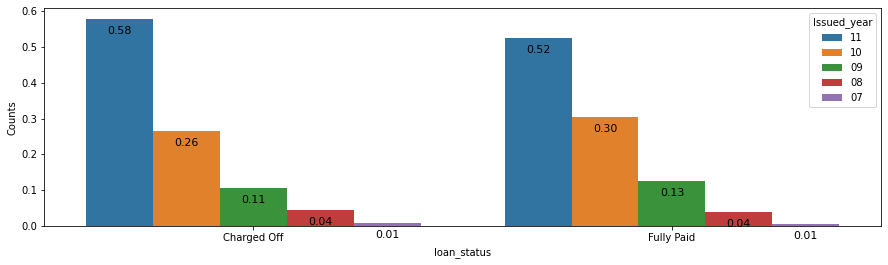

In [193]:
df_u=df_L.groupby(['loan_status'])['Issued_year'].value_counts(normalize=True)
df_u=pd.DataFrame(df_u)
df_u.columns=['Counts']
df_u.reset_index(inplace=True)
splot=sns.barplot(x='loan_status',y='Counts',hue='Issued_year',data=df_u)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png',dpi=150)


**In the year 2011 Most loans are charged off**

**These columns showing significant impact on loan_status 'loan_amnt','int_rate','installment','annual_inc','dti','term','grade','emp_title','emp_length','home_ownership','purpose'**